In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

# Setting device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transform to normalize data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load the training data
train_set = datasets.MNIST('./data', download=True, train=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

# Download and load the test data
test_set = datasets.MNIST('./data', download=True, train=False, transform=transform)
test_loader = DataLoader(test_set, batch_size=1000, shuffle=False)

# Initialize the model and send it to the device
model = Net().to(device)

# Define the optimizer and the loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train the model
n_epochs = 5
model.train()
for epoch in range(n_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')

# Evaluate the model
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.2f}%)')


Epoch 1/5, Loss: 0.07638846337795258
Epoch 2/5, Loss: 0.013973942026495934
Epoch 3/5, Loss: 0.013925377279520035
Epoch 4/5, Loss: 0.0226302370429039
Epoch 5/5, Loss: 0.03780077397823334
Test set: Average loss: 0.0000, Accuracy: 9920/10000 (99.20%)


## CNN in detail

In [1]:
# Import PyTorch
import torch

# We use torchvision to get our dataset and useful image transformations
import torchvision
import torchvision.transforms as transforms

# Import PyTorch's optimization libary and nn
# nn is used as the basic building block for our Network graphs
import torch.optim as optim
import torch.nn as nn

# Are we using our GPU?
print("GPU available: {}".format(torch.cuda.is_available()))

GPU available: True


In [2]:
if torch.cuda.is_available():
  device = 'cuda' 
else:
  device = 'cpu' 

In [3]:
# Transform to a PyTorch tensors and the normalize our valeus between -1 and +1
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, )) ])

In [4]:
trainset = torchvision.datasets.MNIST('./data', train=True, download=True, transform = transform)
# Load our Test Data and specify what transform to use when loading
testset = torchvision.datasets.MNIST('./data',
                                     train = False,
                                     download = True,
                                     transform = transform)

In [5]:
# We have 60,000 Image samples for our training data & 10,000 for our test data
# each 28 x 28 pixels, as they are grayscale, there is no 3rd dimension to our image
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [6]:
print(type(trainset.data[0]))
trainset.data[0].shape

<class 'torch.Tensor'>


torch.Size([28, 28])

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

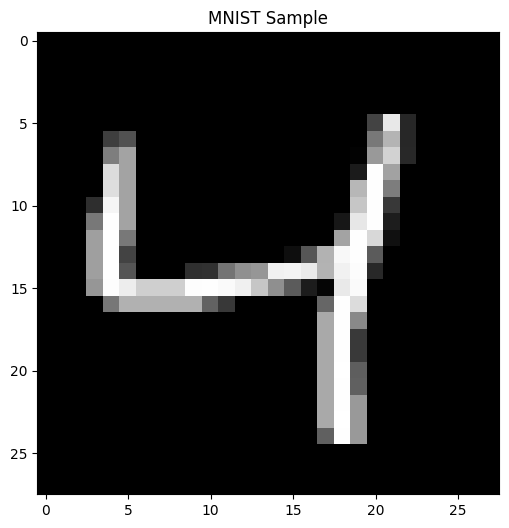

In [8]:
def image_show(title = "", image = None, size =6):
    w, h = image.shape[0], image.shape[1]
    aspect_ration = w/h
    plt.figure(figsize=(size*aspect_ration, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    plt.title(title)
    plt.show()
    
# convert image into numpy array
image = trainset.data[2].numpy()
image_show("MNIST Sample", image)

In [9]:
trainset.targets[2]

tensor(4)

#### Lets show first 50 samples from this dataset

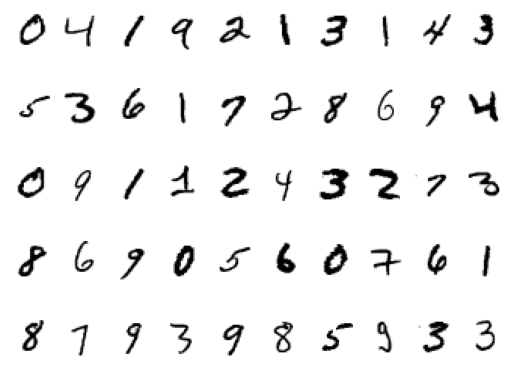

In [10]:
figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images+1):
    plt.subplot(5,10, index)
    plt.axis('off')
    plt.imshow(trainset.data[index], cmap='gray_r')

In [11]:
trainloader = torch.utils.data.DataLoader(dataset=trainset,
                                          batch_size= 128,
                                          shuffle= True, 
                                          num_workers=0 )



In [12]:
testloader = torch.utils.data.DataLoader(testset,
                                        batch_size=128,
                                        shuffle=False,
                                        num_workers=0)

In [15]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


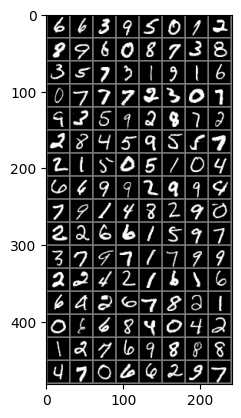

66395012896087383573191607772307935928722845955721505104669929947914829022661597379717992242161664267821066840421276988847066297


In [16]:
# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
# dataiter = iter(trainloader)
# images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(''.join('%1s' % labels[j].numpy() for j in range(128)))

#  Build our Model

We will use the ```nn.Sequential``` method to construct our model. 

### **Building a Convolution Filter Layer**

```
nn.Conv2d(in_channels=1,
          out_channels=32,
          kernel_size=3,
          stride=1,
          padding=1)
```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-29%20at%204.21.04%402x.png)

**What is torch.nn.functional?**

Generally imported into the namespace F by convention, this module contains all the functions in the torch.nn library (whereas other parts of the library contain classes). As well as a wide range of loss and activation functions, you’ll also find here some convenient functions for creating neural nets, such as pooling functions. (There are also functions for doing convolutions, linear layers, etc, but as we’ll see, these are usually better handled using other parts of the library.)

In [17]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### Defining a Loss Function and Optimizer

In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Model Training

In PyTorch we use the building block functions to execute the training algorithm that we should be somewhat familar with by now.

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-29%20at%207.04.32%402x.png)

In [ ]:
# We loop over the traing dataset multiple times (each time is called an epoch)
epochs = 10

# Create some empty arrays to store logs
epoch_log = []
loss_log = []
accuracy_log = []

# Iterate for a specified number of epochs
for epoch in range(epochs):
    print(f'Starting Epoch: {epoch+1}...')

    # We keep adding or accumulating our loss after each mini-batch in running_loss
    running_loss = 0.0

    # We iterate through our trainloader iterator
    # Each cycle is a minibatch
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Move our data to GPU
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Clear the gradients before training by setting to zero
        # Required for a fresh start
        optimizer.zero_grad()

        # Forward -> backprop + optimize
        outputs = net(inputs) # Forward Propagation
        loss = criterion(outputs, labels) # Get Loss (quantify the difference between the results and predictions)
        loss.backward() # Back propagate to obtain the new gradients for all nodes
        optimizer.step() # Update the gradients/weights

        # Print Training statistics - Epoch/Iterations/Loss/Accuracy
        running_loss += loss.item()
        if i % 50 == 49:    # show our loss every 50 mini-batches
            correct = 0 # Initialize our variable to hold the count for the correct predictions
            total = 0 # Initialize our variable to hold the count of the number of labels iterated

            # We don't need gradients for validation, so wrap in
            # no_grad to save memory
            with torch.no_grad():
                # Iterate through the testloader iterator
                for data in testloader:
                    images, labels = data
                    # Move our data to GPU
                    images = images.to(device)
                    labels = labels.to(device)

                    # Foward propagate our test data batch through our model
                    outputs = net(images)

                     # Get predictions from the maximum value of the predicted output tensor
                     # we set dim = 1 as it specifies the number of dimensions to reduce
                    _, predicted = torch.max(outputs.data, dim = 1)
                    # Keep adding the label size or length to the total variable
                    total += labels.size(0)
                    # Keep a running total of the number of predictions predicted correctly
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total
                epoch_num = epoch + 1
                actual_loss = running_loss / 50
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
                running_loss = 0.0

    # Store training stats after each epoch
    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('Finished Training')

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 2.264, Test Accuracy = 44.120%
Epoch: 1, Mini-Batches Completed: 100, Loss: 2.086, Test Accuracy = 62.290%
Epoch: 1, Mini-Batches Completed: 150, Loss: 1.560, Test Accuracy = 76.190%
Epoch: 1, Mini-Batches Completed: 200, Loss: 0.830, Test Accuracy = 84.450%
Epoch: 1, Mini-Batches Completed: 250, Loss: 0.541, Test Accuracy = 87.790%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.450, Test Accuracy = 88.400%
Epoch: 1, Mini-Batches Completed: 350, Loss: 0.406, Test Accuracy = 89.060%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.374, Test Accuracy = 89.900%
Epoch: 1, Mini-Batches Completed: 450, Loss: 0.380, Test Accuracy = 89.930%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.341, Test Accuracy = 90.500%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.355, Test Accuracy = 90.760%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.308, Test Accuracy = 91.060%
Epoch: 2, Mini-Batches Completed: 200, Loss: 0.3